In [1]:
# Import the dependencies.
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [42]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [43]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [44]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
cities

['saint-philippe',
 'cape town',
 'bredasdorp',
 'saint george',
 'amderma',
 'bethel',
 'lithakia',
 'la macarena',
 'ponta do sol',
 'terra santa',
 'albany',
 'charters towers',
 'ushuaia',
 'matara',
 'qaanaaq',
 'constitucion',
 'butaritari',
 'rikitea',
 'tasiilaq',
 'east london',
 'mar del plata',
 'puerto ayora',
 'busselton',
 'yellowknife',
 'malm',
 'ustrzyki dolne',
 'camacha',
 'arraial do cabo',
 'tumut',
 'avarua',
 'new norfolk',
 'bolungarvik',
 'bulawayo',
 'illoqqortoormiut',
 'chivilcoy',
 'vila velha',
 'slupca',
 'kavaratti',
 'ribeira grande',
 'lolua',
 'hermanus',
 'kelvington',
 'abilene',
 'hasaki',
 'goderich',
 'sakassou',
 'conde',
 'san rafael del sur',
 'bac lieu',
 'hithadhoo',
 'vaitupu',
 'soto la marina',
 'yumen',
 'puqi',
 'kapaa',
 'ampanihy',
 'walvis bay',
 'fortuna',
 'mataura',
 'kodiak',
 'vaini',
 'fort nelson',
 'vanimo',
 'schieder-schwalenberg',
 'saleaula',
 'aflu',
 'saryshagan',
 'naze',
 'jamestown',
 'solnechnyy',
 'saurimo',
 'punt

In [45]:
#Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [46]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [35]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san pedro
Processing Record 2 of Set 1 | dauphin
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | vao
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | port blair
Processing Record 7 of Set 1 | lagoa
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | camacha
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | vestmanna
Processing Record 16 of Set 1 | ust-kut
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | lorengau
Processing Record 19 of Set 1 | aklavik
Processing Record 20 of Set 1 | margate
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | hitha

Processing Record 39 of Set 4 | sura
Processing Record 40 of Set 4 | hauterive
Processing Record 41 of Set 4 | oak ridge
Processing Record 42 of Set 4 | ise
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | acapulco
Processing Record 45 of Set 4 | jabiru
City not found. Skipping...
Processing Record 46 of Set 4 | markdorf
Processing Record 47 of Set 4 | temaraia
City not found. Skipping...
Processing Record 48 of Set 4 | alta floresta
Processing Record 49 of Set 4 | naryshkino
Processing Record 50 of Set 4 | tornio
Processing Record 1 of Set 5 | tabou
Processing Record 2 of Set 5 | lerwick
Processing Record 3 of Set 5 | herat
Processing Record 4 of Set 5 | senno
Processing Record 5 of Set 5 | victoria point
Processing Record 6 of Set 5 | tura
Processing Record 7 of Set 5 | sao filipe
Processing Record 8 of Set 5 | bilibino
Processing Record 9 of Set 5 | hopkinsville
Processing Record 10 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 11

Processing Record 31 of Set 8 | itoman
Processing Record 32 of Set 8 | diamantino
Processing Record 33 of Set 8 | benghazi
Processing Record 34 of Set 8 | orocue
Processing Record 35 of Set 8 | tuatapere
Processing Record 36 of Set 8 | northam
Processing Record 37 of Set 8 | katsuura
Processing Record 38 of Set 8 | grindavik
Processing Record 39 of Set 8 | teguldet
Processing Record 40 of Set 8 | bitkine
Processing Record 41 of Set 8 | ariquemes
Processing Record 42 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 43 of Set 8 | isangel
Processing Record 44 of Set 8 | samusu
City not found. Skipping...
Processing Record 45 of Set 8 | zhezkazgan
Processing Record 46 of Set 8 | verkhnevilyuysk
Processing Record 47 of Set 8 | alofi
Processing Record 48 of Set 8 | litein
Processing Record 49 of Set 8 | nizhniy baskunchak
Processing Record 50 of Set 8 | kavaratti
Processing Record 1 of Set 9 | maloshuyka
City not found. Skipping...
Processing Record 2 of Set 9 | lompoc
Proces

Processing Record 19 of Set 12 | caetite
Processing Record 20 of Set 12 | general roca
Processing Record 21 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 22 of Set 12 | bolobo
Processing Record 23 of Set 12 | qandala
Processing Record 24 of Set 12 | narsaq
Processing Record 25 of Set 12 | cap malheureux
Processing Record 26 of Set 12 | dudinka
Processing Record 27 of Set 12 | potgietersrus
City not found. Skipping...
Processing Record 28 of Set 12 | inhambane
Processing Record 29 of Set 12 | gazli
Processing Record 30 of Set 12 | russkiy kameshkir
Processing Record 31 of Set 12 | adolfo lopez mateos
Processing Record 32 of Set 12 | saldanha
Processing Record 33 of Set 12 | pochutla
Processing Record 34 of Set 12 | eyl
Processing Record 35 of Set 12 | japura
Processing Record 36 of Set 12 | chumikan
Processing Record 37 of Set 12 | yarim
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
#Reading the panda
df=pd.read_csv('weather_data/cities.csv')
city_data=pd.DataFrame(df)
city_data

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,San Pedro,PH,2022-02-04 04:08:02,14.3500,121.0167,89.31,56,89,11.74
1,1,Dauphin,CA,2022-02-04 04:08:03,51.1494,-100.0502,-3.21,98,99,9.15
2,2,New Norfolk,AU,2022-02-04 04:08:03,-42.7826,147.0587,73.65,34,3,3.00
3,3,Vao,NC,2022-02-04 04:08:03,-22.6667,167.4833,75.29,92,100,3.94
4,4,Port Blair,IN,2022-02-04 04:08:04,11.6667,92.7500,80.64,74,20,9.22
...,...,...,...,...,...,...,...,...,...,...
540,540,Pochutla,MX,2022-02-04 04:22:07,15.7432,-96.4661,72.82,73,0,3.60
541,541,Eyl,SO,2022-02-04 04:22:07,7.9803,49.8164,70.14,69,1,11.12
542,542,Japura,ID,2022-02-04 04:22:07,-0.3167,102.3500,86.41,59,93,4.41
543,543,Chumikan,RU,2022-02-04 04:22:08,54.7183,135.3150,3.04,75,100,15.50


In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,San Pedro,PH,2022-02-04 04:08:02,14.3500,121.0167,89.31,56,89,11.74
1,1,Dauphin,CA,2022-02-04 04:08:03,51.1494,-100.0502,-3.21,98,99,9.15
2,2,New Norfolk,AU,2022-02-04 04:08:03,-42.7826,147.0587,73.65,34,3,3.00
3,3,Vao,NC,2022-02-04 04:08:03,-22.6667,167.4833,75.29,92,100,3.94
4,4,Port Blair,IN,2022-02-04 04:08:04,11.6667,92.7500,80.64,74,20,9.22
5,5,Lagoa,PT,2022-02-04 04:05:38,39.0500,-27.9833,57.67,76,100,11.30
6,6,Hilo,US,2022-02-04 04:08:04,19.7297,-155.0900,73.13,83,100,5.75
7,7,Camacha,PT,2022-02-04 04:05:09,33.0833,-16.3333,63.54,94,20,8.05
8,8,Chuy,UY,2022-02-04 04:08:05,-33.6971,-53.4616,70.92,95,100,6.29
9,9,Rikitea,PF,2022-02-04 04:08:05,-23.1203,-134.9692,78.22,74,100,17.02


In [7]:
#ordering the columns
new_column_order=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Pedro,PH,2022-02-04 04:08:02,14.3500,121.0167,89.31,56,89,11.74
1,Dauphin,CA,2022-02-04 04:08:03,51.1494,-100.0502,-3.21,98,99,9.15
2,New Norfolk,AU,2022-02-04 04:08:03,-42.7826,147.0587,73.65,34,3,3.00
3,Vao,NC,2022-02-04 04:08:03,-22.6667,167.4833,75.29,92,100,3.94
4,Port Blair,IN,2022-02-04 04:08:04,11.6667,92.7500,80.64,74,20,9.22
...,...,...,...,...,...,...,...,...,...
540,Pochutla,MX,2022-02-04 04:22:07,15.7432,-96.4661,72.82,73,0,3.60
541,Eyl,SO,2022-02-04 04:22:07,7.9803,49.8164,70.14,69,1,11.12
542,Japura,ID,2022-02-04 04:22:07,-0.3167,102.3500,86.41,59,93,4.41
543,Chumikan,RU,2022-02-04 04:22:08,54.7183,135.3150,3.04,75,100,15.50


In [3]:
# Create the output file (CSV).
# output_data_file = "weather_data/cities.csv"
# # Export the City_Data into a CSV.
# city_data_df.to_csv(output_data_file, index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


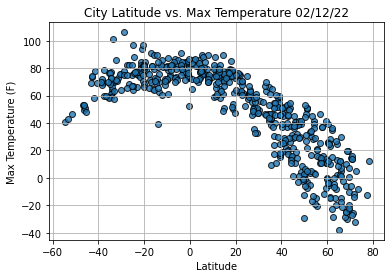

In [9]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

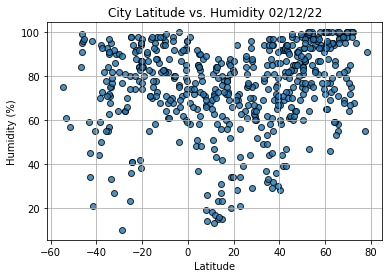

In [10]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

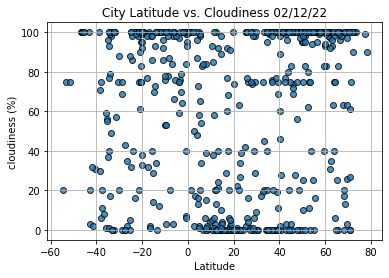

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

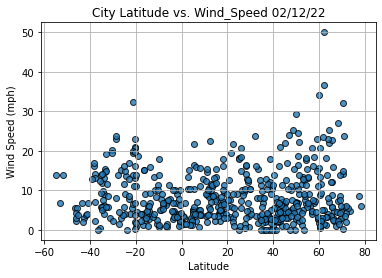

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind_Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="green")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
index13 = city_data_df.loc[13]
index13

City                      Ust-Kut
Country                        RU
Date          2022-02-04 04:08:07
Lat                       56.7938
Lng                      105.7672
Max Temp                    10.67
Humidity                       87
Cloudiness                    100
Wind Speed                   4.63
Name: 13, dtype: object

In [19]:
#This code help us to get in the "lat" column all the values that are greater than 0 but in boolean format or list
#city_data_df["Lat"] >= 0

#If we want to get a DataFrame we need to write down the next code
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Pedro,PH,2022-02-04 04:08:02,14.3500,121.0167,89.31,56,89,11.74
1,Dauphin,CA,2022-02-04 04:08:03,51.1494,-100.0502,-3.21,98,99,9.15
4,Port Blair,IN,2022-02-04 04:08:04,11.6667,92.7500,80.64,74,20,9.22
5,Lagoa,PT,2022-02-04 04:05:38,39.0500,-27.9833,57.67,76,100,11.30
6,Hilo,US,2022-02-04 04:08:04,19.7297,-155.0900,73.13,83,100,5.75
7,Camacha,PT,2022-02-04 04:05:09,33.0833,-16.3333,63.54,94,20,8.05
10,Dikson,RU,2022-02-04 04:08:06,73.5069,80.5464,-8.03,95,100,4.81
12,Vestmanna,FO,2022-02-04 04:08:07,62.1564,-7.1664,34.72,69,100,36.82
13,Ust-Kut,RU,2022-02-04 04:08:07,56.7938,105.7672,10.67,87,100,4.63
16,Aklavik,CA,2022-02-04 04:08:08,68.2191,-135.0107,-24.88,98,17,7.34


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

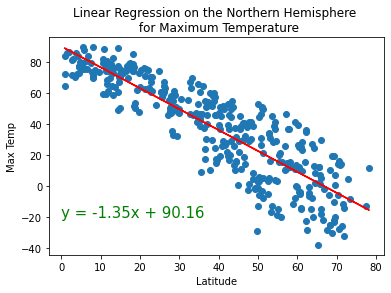

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,-20))

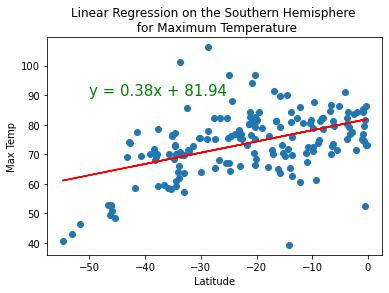

In [51]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

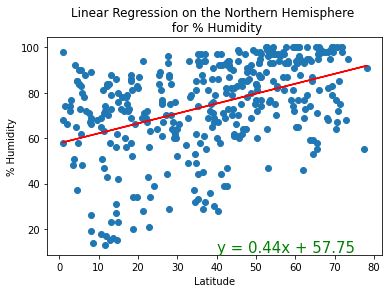

In [52]:
# Linear regression on the Northern Hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

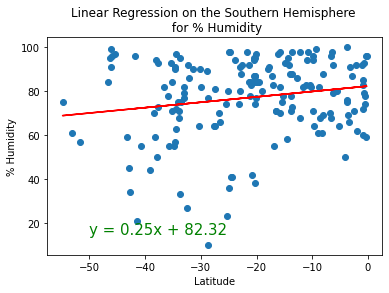

In [53]:
# Linear regression on the Southern Hemisphere for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

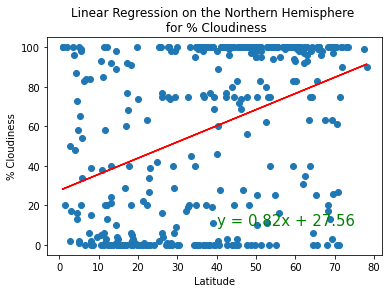

In [54]:
# Linear regression on the Northern Hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

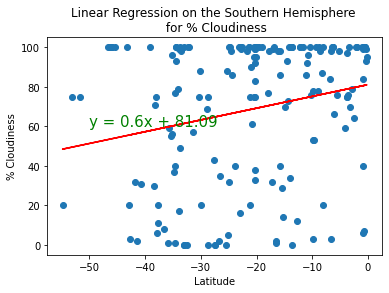

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

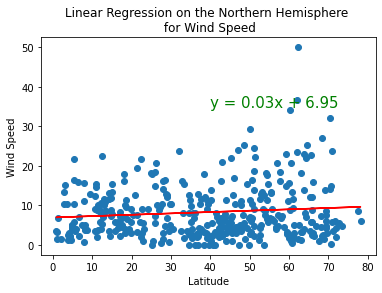

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

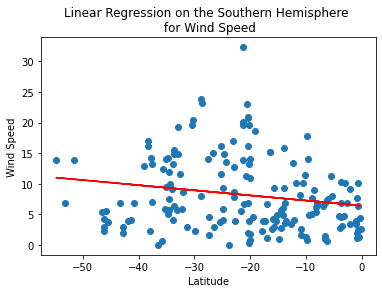

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))